In [5]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']

# 一.读取数据

In [6]:
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=" ")
test_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=" ")
print("训练数据维度:|{}|".format(train_data.shape))
print("测试数据维度:|{}|".format(test_data.shape))
print("训练集columns:", train_data.columns)
print("测试集columns:", test_data.columns)
chn_columns = ['交易ID', '汽车名称', '注册日期', '车型编码', '汽车品牌', '车身类型', '燃油类型', '变速箱', '发动机功率', '汽车已行驶公里',
                  '汽车存在尚未修复的损坏', '地区编码', '销售方', '报价类型', '汽车上线时间', '价格','v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
eng_columns = ['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
               'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
               'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 200)
train_data.rename( columns = dict( zip( eng_columns,chn_columns )) ).head(5)

训练数据维度:|(150000, 31)|
测试数据维度:|(50000, 30)|
训练集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')
测试集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')


,交易ID,汽车名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,汽车已行驶公里,汽车存在尚未修复的损坏,地区编码,销售方,报价类型,汽车上线时间,价格,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 二.数据探索

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

<AxesSubplot:title={'center':'test data'}>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


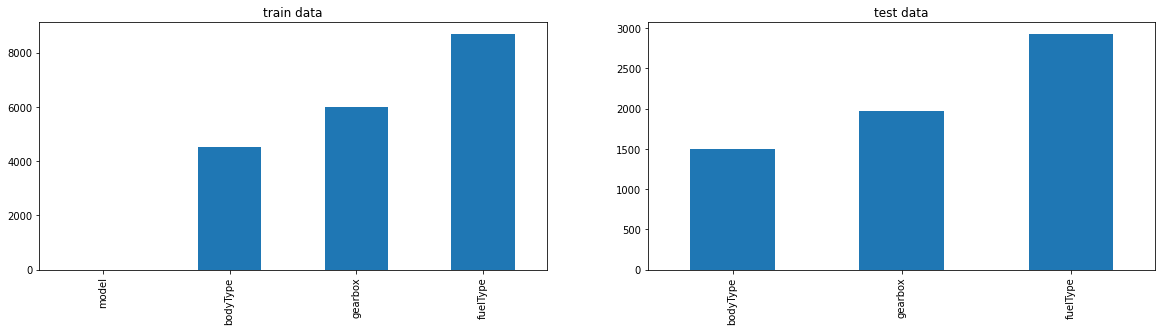

In [7]:
"""
-----------------------缺失值分析--------------------------
结论:
缺失值字段：model, bodyType, fuelType, gearbox 
类别型字段：notRepairedDamage
"""
print(train_data.info())
print("="*80)
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(221)
plt.title('train data')
null_cols = train_data.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols.sort_values().plot.bar()

fig.add_subplot(222)
plt.title('test data')
null_cols = test_data.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols.sort_values().plot.bar()

price max:|99999|, price min:|11|


<AxesSubplot:ylabel='Frequency'>

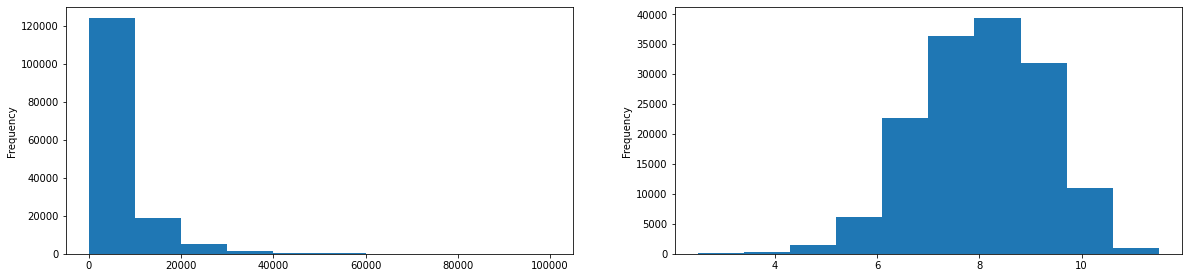

In [8]:
"""
---------------------------价格分析---------------------
将价格长尾分布做 log(x+1) 映射
np.log1p() 反变换 np.expm1()
"""
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(221)
# plt.title('价格变换前')
train_data['price'].plot.hist()
print('price max:|{}|, price min:|{}|'.format(train_data.price.max(), train_data.price.min()))
fig.add_subplot(222)
train_data['price'] = train_data['price'].apply(lambda x: np.log1p(x))
# plt.title('价格变换后')
train_data['price'].plot.hist()

<AxesSubplot:>

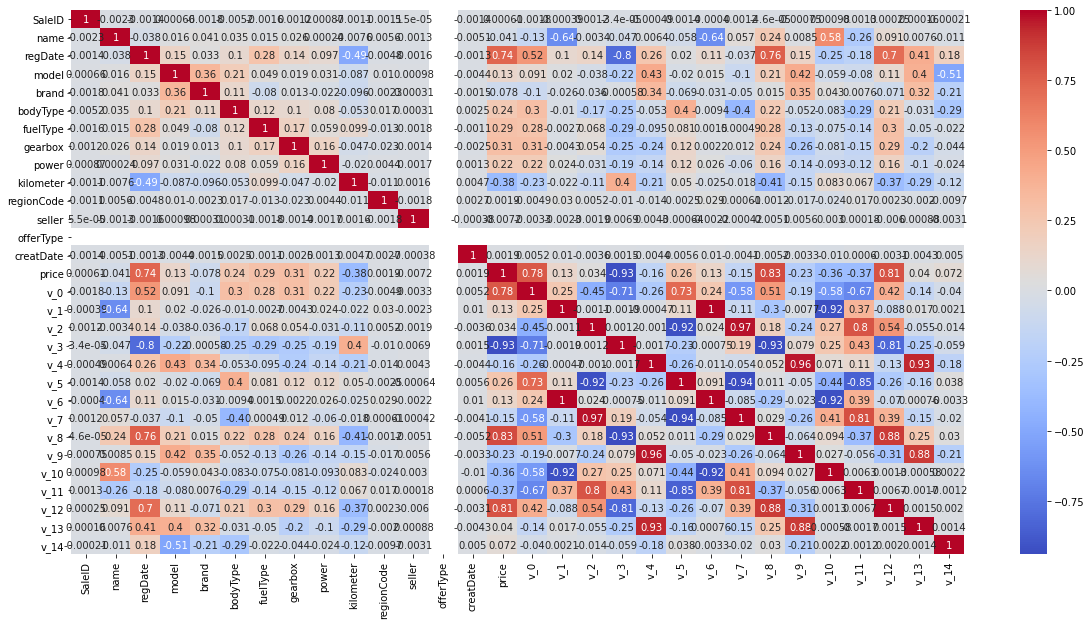

In [9]:
"""
-----------------------特征相似度分析-----------------------
结论：
一下几个特征高度相关，后面考虑删除v_1, v_2, v_4
v_1 == v_6
v_2 == v_7
v_4 == v_9, v_13
"""
plt.figure( figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [10]:
"""
------------------------训练集和测试集合并--------------------
"""
train_size = train_data.shape[0]
test_size = test_data.shape[0]
df = pd.concat([train_data, test_data], ignore_index=True)
print(df.shape)
df.head()

(200000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,7.523481,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,8.188967,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,8.736007,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,7.783641,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,8.556606,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [11]:
"""
-------------------查找连续型特征-------------------
结论：
['offerType', 1]：该字段只有一个取值，属与无用字段，应drop
可以考虑对一下特征做分桶
 ['name', 128660],
 ['regDate', 3898],
 ['model', 249],
 ['power', 458],
 ['regionCode', 8010],
 ['creatDate', 106],
"""
ccm_type = [[col, len(df[col].unique())] for col in df.columns]
ccm_type

[['SaleID', 200000],
 ['name', 128660],
 ['regDate', 3898],
 ['model', 249],
 ['brand', 40],
 ['bodyType', 9],
 ['fuelType', 8],
 ['gearbox', 3],
 ['power', 616],
 ['kilometer', 13],
 ['notRepairedDamage', 3],
 ['regionCode', 8010],
 ['seller', 2],
 ['offerType', 1],
 ['creatDate', 106],
 ['price', 3764],
 ['v_0', 189740],
 ['v_1', 189741],
 ['v_2', 189740],
 ['v_3', 189741],
 ['v_4', 189741],
 ['v_5', 183941],
 ['v_6', 144599],
 ['v_7', 182791],
 ['v_8', 187726],
 ['v_9', 185291],
 ['v_10', 189740],
 ['v_11', 189740],
 ['v_12', 189740],
 ['v_13', 189741],
 ['v_14', 189741]]

In [12]:
"""
-------------------notRepairedDamage--------------------
结论：
将 '-' 做众数填充
"""
df['notRepairedDamage'].value_counts()

0.0    148585
-       32393
1.0     19022
Name: notRepairedDamage, dtype: int64

In [13]:
"""
-------------------power字段分析--------------------
结论：
训练集power异常值数量为121个
训练集+测试集power异常值数量为158个
"""
print(train_data['power'][train_data['power'] > 600].value_counts())
df['power'][df['power'] > 600].value_counts()

612      4
1598     4
1500     3
950      3
1403     2
1001     2
601      2
2017     2
610      2
999      2
7511     2
1995     2
1003     2
603      2
3500     2
1011     2
850      1
1360     1
6226     1
1363     1
1416     1
7544     1
1162     1
1103     1
7515     1
7512     1
602      1
851      1
4700     1
1895     1
1896     1
7529     1
1367     1
1900     1
1164     1
19312    1
625      1
776      1
1597     1
13636    1
8259     1
1796     1
604      1
1800     1
1801     1
11530    1
17932    1
1299     1
10520    1
1054     1
800      1
801      1
2340     1
16312    1
6920     1
629      1
5420     1
17700    1
8500     1
1079     1
1082     1
1596     1
1653     1
1090     1
17011    1
1021     1
1398     1
1501     1
1115     1
1689     1
5815     1
952      1
14009    1
1988     1
1312     1
620      1
1993     1
1998     1
1241     1
1503     1
12012    1
1506     1
2729     1
740      1
2792     1
10218    1
1771     1
1004     1
1005     1
751      1
1012     1

1598     5
612      5
603      3
999      3
1001     3
950      3
1500     3
1003     2
1995     2
629      2
650      2
1011     2
7511     2
700      2
601      2
2017     2
620      2
1400     2
1103     2
1016     2
610      2
1403     2
3500     2
751      2
1800     2
8259     1
851      1
776      1
1162     1
1090     1
1600     1
2009     1
1416     1
850      1
13636    1
7529     1
1360     1
6226     1
1363     1
7512     1
1597     1
602      1
7515     1
4700     1
771      1
1900     1
19208    1
1895     1
1896     1
1367     1
7544     1
1021     1
1596     1
17932    1
12512    1
10520    1
1002     1
1299     1
11025    1
10522    1
1405     1
1055     1
11530    1
1801     1
604      1
1796     1
11011    1
17410    1
1054     1
800      1
1082     1
17700    1
1079     1
9013     1
8500     1
4400     1
19312    1
9007     1
5420     1
801      1
6920     1
19211    1
1221     1
16312    1
1000     1
2340     1
1164     1
6010     1
625      1
1312     1
6006     1

In [14]:
"""
--------------------------seller----------------------
结论：
seller中只有一个sample取值为1，属于无用字段，丢弃
"""
print(train_data['seller'].value_counts())
print(df['seller'].value_counts())

0    149999
1         1
Name: seller, dtype: int64
0    199999
1         1
Name: seller, dtype: int64


<AxesSubplot:ylabel='Frequency'>

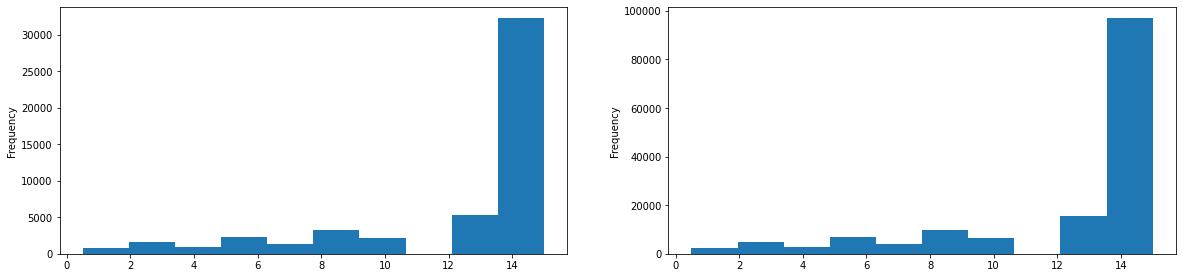

In [15]:
"""
-----------------------------kilometer------------------------
结论：
训练集测试集数据分布较一至
"""
fig = plt.figure(figsize=(20,10))
fig.add_subplot(221)
# plt.title('测试集')
test_data['kilometer'].plot.hist()
fig.add_subplot(222)
# plt.title('训练集')
train_data['kilometer'].plot.hist()

In [16]:
"""
-----------------------------------regionCode------------------------
"""
df['regionCode'].value_counts()

419     489
764     356
176     184
462     176
125     174
       ... 
7448      1
7670      1
8097      1
7662      1
4343      1
Name: regionCode, Length: 8010, dtype: int64

In [17]:
"""
----------------------------------brand-------------------------------
"""
df['brand'].value_counts()

0     41953
4     22269
14    21434
10    18962
1     18421
6     13717
9      9666
5      6150
13     5203
11     3887
3      3281
7      3088
16     2993
25     2792
8      2785
27     2676
21     2090
15     1934
19     1861
20     1647
12     1508
22     1443
26     1294
30     1261
17     1225
24     1020
28      865
32      775
29      545
37      450
2       436
31      431
18      423
33      302
34      302
36      300
35      255
23      246
38       96
39       14
Name: brand, dtype: int64

In [18]:
"""
-------------------------------'regDate', 'creatDate',--------------------------
regDate日期格式转换出现错误，
在错误的日期里只有月份的数据是错误的，出现月份为0
暂时不做处理，后面做特征工程的时候再处理
to_datetime三个解决日期匹配错误的参数
errors = raise: 遇到错误信息给出提示
         coerce: 遇到错误信息将其设置为nat
         ignore: 只保留能够转换的值
"""
regdate = pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')
null_regdate = df['regDate'][regdate.isnull()]
print(null_regdate)
# year, month, day  = null_regdate.apply(lambda x: str(x)[0:4], str(x)[4:6], str(x)[6:8])
year = null_regdate.apply(lambda x: str(x)[0:4])
month = null_regdate.apply(lambda x: str(x)[4:6])
day = null_regdate.apply(lambda x: str(x)[6:])
print("year max:|{}|, year min:|{}|".format(year.max(), year.min()))
print("month max:|{}|, month min:|{}|".format(month.max(), month.min()))
print("day max:|{}|, day min:|{}|".format(day.max(), day.min()))
creatdata = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
print(df['creatDate'][creatdata.isnull()])

14        20070009
20        19970004
22        19970008
42        19960009
51        20020006
            ...   
199916    20150008
199925    20020003
199935    19960007
199938    20080004
199939    19950006
Name: regDate, Length: 15083, dtype: int64
year max:|2015|, year min:|1991|
month max:|00|, month min:|00|
day max:|12|, day min:|01|
Series([], Name: creatDate, dtype: int64)


In [19]:
# regdate = df['regDate'].map(lambda x: datetime.strptime(str(x), "%Y%m%d"))
# regdate

# 二.数据预处理

In [20]:
"""
缺失值填充零
将notRepairedDamage字段的异常值填充众数
"""
df = df.fillna(0)
df[ 'notRepairedDamage' ].replace('-', '0.0', inplace=True)#.astype("float32")
df[ 'notRepairedDamage' ] = df[ 'notRepairedDamage' ].astype("float32")

In [21]:
"""
丢弃无用字段
seller, offerType, Saleid
"""
# df.drop(['seller', 'offerType'], axis=1, inplace=True)

'\n丢弃无用字段\nseller, offerType, Saleid\n'

In [22]:
"""
处理power字段
"""
df['power'][df['power'] > 600] = 600
df['power'].max()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


600

In [23]:
def abnormal_date_process(date):
    str_date = str(date)
    year = int(str_date[0:4])
    month = int(str_date[4:6])
    day = int(str_date[6:])
    if month<1:
        month = 1
    elif month>12:
        month = 12
    return datetime(year, month, day) 
df['creatDate'] = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
df['regDate'] = df['regDate'].apply(abnormal_date_process)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             200000 non-null  int64         
 1   name               200000 non-null  int64         
 2   regDate            200000 non-null  datetime64[ns]
 3   model              200000 non-null  float64       
 4   brand              200000 non-null  int64         
 5   bodyType           200000 non-null  float64       
 6   fuelType           200000 non-null  float64       
 7   gearbox            200000 non-null  float64       
 8   power              200000 non-null  int64         
 9   kilometer          200000 non-null  float64       
 10  notRepairedDamage  200000 non-null  float32       
 11  regionCode         200000 non-null  int64         
 12  seller             200000 non-null  int64         
 13  offerType          200000 non-null  int64   

# 三.特征工程

In [25]:
"""
-------------------------提取时间类型数据-------------------------------
"""
# df_newcols = pd.DataFrame()
df['use_day'] = (pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce') \
                         - pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')).dt.days
df['creatDate_year'] = df['creatDate'].dt.year
df['creatDate_month'] = df['creatDate'].dt.month
# df['creatDate_day'] = df['creatDate'].dt.day
df['regDate_year'] = df['regDate'].dt.year
df['regDate_month'] = df['regDate'].dt.month
# df['regDate_day'] = df['regDate'].dt.day

In [26]:
# 发动机功率分桶
bin_ = [i * 10 for i in range(-1,61)]
df['power_bin'] = pd.cut(df['power'], bin_, labels=False)
df['power_bin'].value_counts()

11    24026
8     17565
0     17219
14    16008
6     15351
15    14228
12    12986
9     11884
17    10856
13     9190
7      7360
18     5458
20     4586
5      4492
10     4153
24     3174
19     3115
16     2889
22     2683
21     1974
23     1841
25     1418
28     1052
31      847
26      597
29      551
27      506
30      488
34      444
32      381
33      307
4       288
35      279
39      224
36      215
60      201
42      114
1       113
45      107
40      105
41      101
37       83
44       71
51       60
2        55
50       47
48       45
46       37
53       36
56       32
38       30
52       25
3        24
43       24
49       21
58       12
59        8
55        4
47        4
54        3
57        3
Name: power_bin, dtype: int64

1     34443
2     28196
3     24197
5     19939
0     15535
4     14819
7     11708
8      6897
6      6117
9      5154
11     5092
12     4485
10     3426
13     3204
17     2808
16     2628
18     2310
14     2198
15     1518
19     1327
20     1175
22     1027
21      883
23      640
24      235
25       39
Name: model_bin, dtype: int64

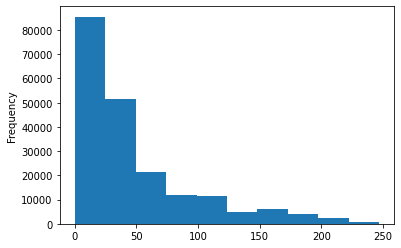

In [27]:
df['model'].plot.hist()
# print("model max:|{}|, model min:|{}|".format(df['model'].max(), df['model'].min()))
bin_ = [i*10 for i in range(-1, 30)]
df['model_bin'] = pd.cut(df['model'], bin_, labels=False)
df['model_bin'].value_counts()

In [28]:
groupby_train = df[:train_size]
def price_groupby(df, col):
    infos = {}
    for name, group in groupby_train.groupby(col):
        info = {}
        info[col + '_price_max'] = group['price'].max()
        info[col + '_price_min'] = group['price'].min()
        info[col + '_price_mean'] = group['price'].mean()
        info[col + '_price_sum'] = group['price'].sum()
        info[col + '_price_std'] = group['price'].std()
        info[col + '_price_sum'] = group['price'].median()
        infos[name] = info
    info_df = pd.DataFrame(infos).T.reset_index().rename(columns={"index":col})
    df = df.merge(info_df, how='left', on=col)
    return df
cols = ["brand", "bodyType", "fuelType", "gearbox", "kilometer", "notRepairedDamage",
         "regDate_year",  "model_bin", "power_bin", "creatDate_year", "creatDate_month", "regDate_month", 
       ]
#"power_bin", "creatDate_year", "creatDate_month", "regDate_month", 加入这几个特征的聚合之后loss收敛平滑了很多

for col in cols:
    df = price_groupby(df, col=col)
print(df.shape)
df.head()

(200000, 98)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,use_day,creatDate_year,creatDate_month,regDate_year,regDate_month,power_bin,model_bin,brand_price_max,brand_price_min,brand_price_mean,brand_price_sum,brand_price_std,bodyType_price_max,bodyType_price_min,bodyType_price_mean,bodyType_price_sum,bodyType_price_std,fuelType_price_max,fuelType_price_min,fuelType_price_mean,fuelType_price_sum,fuelType_price_std,gearbox_price_max,gearbox_price_min,gearbox_price_mean,gearbox_price_sum,gearbox_price_std,kilometer_price_max,kilometer_price_min,kilometer_price_mean,kilometer_price_sum,kilometer_price_std,notRepairedDamage_price_max,notRepairedDamage_price_min,notRepairedDamage_price_mean,notRepairedDamage_price_sum,notRepairedDamage_price_std,regDate_year_price_max,regDate_year_price_min,regDate_year_price_mean,regDate_year_price_sum,regDate_year_price_std,model_bin_price_max,model_bin_price_min,model_bin_price_mean,model_bin_price_sum,model_bin_price_std,power_bin_price_max,power_bin_price_min,power_bin_price_mean,power_bin_price_sum,power_bin_price_std,creatDate_year_price_max,creatDate_year_price_min,creatDate_year_price_mean,creatDate_year_price_sum,creatDate_year_price_std,creatDate_month_price_max,creatDate_month_price_min,creatDate_month_price_mean,creatDate_month_price_sum,creatDate_month_price_std,regDate_month_price_max,regDate_month_price_min,regDate_month_price_mean,regDate_month_price_sum,regDate_month_price_std
0,0,736,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,2016-04-04,7.523481,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385,2016,4,2004,4,6,3,11.000448,2.639057,7.508596,7.496097,1.225863,11.512925,2.564949,7.398081,7.378384,1.083882,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.383966,2.639057,8.234648,8.318986,1.116438,11.512925,2.484907,8.140313,8.188967,1.176197,11.512925,3.931826,8.183759,8.188689,0.688489,11.338584,3.044522,7.713467,7.783224,1.184106,9.472782,2.639057,6.927287,6.908755,0.897586,11.512925,2.484907,8.035215,8.086718,1.21823,11.461643,2.484907,8.090091,8.160804,1.210772,11.439290,3.663562,8.132023,8.188967,1.199701
1,1,2262,2003-03-01,40.0,1,2.0,0.0,0.0,0,15.0,0.0,4366,0,0,2016-03-09,8.188967,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757,2016,3,2003,3,0,4,11.511935,2.772589,8.598652,8.779557,1.146815,11.154835,2.772589,8.120166,8.160804,1.120789,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.512925,2.484907,7.701692,7.719130,1.096184,11.512925,2.484907,8.140313,8.188967,1.176197,11.049317,3.583519,7.919557,7.919720,0.732221,11.149082,2.772589,8.158226,8.216358,1.145834,11.512925,2.484907,7.166860,7.170888,1.254539,11.512925,2.484907,8.035215,8.086718,1.21823,11.512925,2.484907,8.023518,8.071219,1.219571,11.385001,3.931826,8.066628,8.101981,1.186401
2,2,14874,2004-04-03,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,2016-04-02,8.736007,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382,2016,4,2004,4,17,12,10.714440,4.615121,9.036202,9.047939,0.609883,11.512925,2.564949,7.398081,7.378384,1.083882,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.383966,2.639057,8.234648,8.318986,1.116438,11.512925,2.484907,8.140313,8.188967,1.176197,11.512925,3.931826,8.183759,8.188689,0.688489,10.949068,3.931826,8.547097,8.682877,1.103066,11.396403,3.688879,8.686484,8.817446,0.900209,11.512925,2.484907,8.035215,8.086718,1.21823,11.461643,2.484907,8.090091,8.160804,1.210772,11.439290,3.663562,8.132023,8.188967,1.199701
3,3,71865,1996-09-08,109.0,10,0.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 98 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   SaleID                        200000 non-null  int64         
 1   name                          200000 non-null  int64         
 2   regDate                       200000 non-null  datetime64[ns]
 3   model                         200000 non-null  float64       
 4   brand                         200000 non-null  int64         
 5   bodyType                      200000 non-null  float64       
 6   fuelType                      200000 non-null  float64       
 7   gearbox                       200000 non-null  float64       
 8   power                         200000 non-null  int64         
 9   kilometer                     200000 non-null  float64       
 10  notRepairedDamage             200000 non-null  float32       
 11  regionCode   

In [30]:
# df.info()
"""
聚合后两个出现null值的特征字段，power, creatDate_year,
-------------------------power-------------------------
在power_bin==55这个桶里面,只有一个值，不能用来计算方差计算出来的值为零
in：print(df["power_bin"][df["power_bin_price_std"].isnull()])
    df['price'][df['power_bin']==55]
out: 149644    55
     159386    55
     169769    55
     180325    55
     Name: power_bin, dtype: int64
     149644    11.332614
     159386     0.000000
     169769     0.000000
     180325     0.000000
---------------------------creatDate_year----------------------------
creatDate_year里面出现price==0的样本是在测试集里面，所有可以不用管
in：print(df["creatDate_year"][df["creatDate_year_price_std"].isnull()])
    df['price'][df["creatDate_year"]==2014]
out:155610    2014
    Name: creatDate_year, dtype: int64
    155610    0.0
    Name: price, dtype: float64

"""
df['power_bin_price_std'][df['power_bin']==55] = 11.33
df['creatDate_month_price_std'][df["creatDate_month"]==6] = 9.25
# df['creatDate_year_price_std'][df['power_bin']==55]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# creatDate_month_price_std
df["creatDate_month"][df["creatDate_month_price_std"].isnull()]
df['price'][df["creatDate_month"]==6]

52953    9.249657
Name: price, dtype: float64

In [32]:
"""
--------------------------------特征筛选----------------------------
丢弃特征：
'SaleID', 'name', 'regDate', 'model', 'seller', 'creatDate', 'offerType',
"""

df.columns
df.drop(['SaleID', 'name', 'regDate', 'model', 'seller', 'creatDate', 'offerType',], axis=1, inplace=True)
train_data = df[0:train_size]
test_data = df[train_size:]
train_y = train_data['price']
train_x = train_data.drop(['price'], axis=1)
test_x = test_data.drop(['price'], axis=1)
print(train_x.shape, train_y.shape, test_x.shape)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=1/3, random_state=33)

(150000, 90) (150000,) (50000, 90)


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scales = MinMaxScaler( feature_range=(0,1))
train_x = scales.fit_transform( train_x )
valid_x = scales.transform( valid_x )

loss不收敛的原因：
1.有无数据归一化会对结果照成很大影响
2.学习率设置过小
3.没有加激活函数
4.网络结果不对

In [ ]:

#神经网络训练
from __future__ import print_function, division
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils import data
from torch.autograd import Variable
import numpy as np
from torchvision import models
import os
import math
import cv2
from sklearn.metrics import mean_absolute_error
# from dl_predict import eval_data


batch_size = 16
learning_rate = 0.0001



def data_load( train_x, train_y ):
    train_x = torch.from_numpy( train_x.astype(np.float32) )
    train_y = torch.from_numpy( train_y.astype(np.float32) )
    train_y = torch.unsqueeze( train_y, dim=1 )
    train_data = data.TensorDataset( train_x, train_y )
    train_loader = data.DataLoader( dataset = train_data,
                                    batch_size = 64,
                                    shuffle = True,
                                    num_workers=1 )
    return train_loader





class mlpmodel(nn.Module):
    def __init__(self, column_num):
        self.column_num = column_num
        super(mlpmodel, self).__init__()
        # 这里全连接层的输出个数 ALexNet中的数倍。使用dropout来缓解过拟合。
        self.hidden1 = nn.Sequential(
  
            nn.Linear(self.column_num, 56),
            nn.ReLU(),         
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(56, 128),
            nn.ReLU(),
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(128, 56),
            nn.ReLU(),
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(56, 28),
            nn.ReLU(),
        )
        self.out = nn.Sequential(
            nn.Linear(28, 1),
        )
        
    def forward(self, train_x ):
        fc1 = self.hidden1( train_x )
        fc2 = self.hidden2( fc1 )
        output = self.out( fc2 )
        return output



    

model = mlpmodel(column_num=90)
if torch.cuda.is_available():
    model.cuda()
params = [{'params': md.parameters()} for md in model.children()
          if md in [model.out]]
optimizer = optim.Adam(model.parameters(), lr=learning_rate, )
loss_func = nn.L1Loss()

def train( train_x,
           train_y,
           epochs=1000):
    loss_list = []
    accuracy_list = []
    for epoch in range(epochs):
        print("================================epoch:|{}|=========================".format(epoch))
        epoch_loss = 0.
        epoch_acc = 0.
        train_datas = data_load( train_x=train_x, train_y=train_y )
        for batch_x, batch_y in train_datas:
            batch_x, batch_y = Variable(batch_x), Variable(batch_y)
#             print("batch_x:|{}|,batch_y:|{}|".format(np.shape(batch_x), np.shape(batch_y)))
            output = model(batch_x)
#             print("预测结果：|{}|，真实结果：|{}|".format( out[0], batch_y[0] ))
            batch_loss = loss_func(output, batch_y)
            epoch_loss += batch_loss.item()
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()
        print("epoch:|{}|,train loss:|{}".format( epoch, epoch_loss/len(train_y)))
#         if epoch_loss/len(train_y) <= 13:
        test_loss = predict( valid_x=valid_x, valid_y=valid_y.values )
        
    torch.save(model.state_dict(), 'model/model_%0.4f.pkl' % ( epoch_loss ))
        
        
def predict( valid_x,
             valid_y ):
    test_data = data_load( train_x=valid_x, train_y=valid_y )
    model.eval()
    loss_sum = 0.
    outs_y = []
    mean_mae = 0
    for batch_x, batch_y in test_data:
        batch_x, batch_y = Variable(batch_x), Variable(batch_y)
        out = model(batch_x)  
        loss = loss_func(out, batch_y)
        loss_sum += loss.item()
        out = np.expm1(out.detach().numpy())
        batch_y = np.expm1(batch_y.detach().numpy())
#         out = out.detach().numpy()
#         batch_y = batch_y.detach().numpy()
        outs_y.extend(out)
        mean_mae += mean_absolute_error(batch_y, out)
    siteen_MAE = mean_absolute_error(batch_y, out)
    print("16个样本的MAE:|{}|".format(siteen_MAE))
    print("测试集：out:|{}|, true label:|{}|".format(batch_y, out))

    print('50000个样本的MAE:|{}|'.format(mean_mae / len(test_data)))
    return loss_sum




train( train_x=train_x, train_y=train_y.values )
test_loss = predict( valid_x=valid_x, valid_y=valid_y.values )
print("测试集数量：|{}|,总的loss:|{}|".format( valid_y.shape, test_loss ))


================================epoch:|0|=========================
epoch:|0|,train loss:|0.028726636834442616
16个样本的MAE:|988.8626708984375|
测试集：out:|[[  350.00006]
 [10900.001  ]
 [ 9999.001  ]
 [ 4149.999  ]
 [ 7900.0015 ]
 [  500.00003]
 [  199.99995]
 [13999.006  ]
 [  450.     ]
 [  750.     ]
 [  800.0001 ]
 [  900.0001 ]
 [17900.004  ]
 [  500.00003]
 [  980.00024]
 [  399.99997]]|, true label:|[[  339.1307 ]
 [ 7760.0723 ]
 [ 7278.0283 ]
 [ 5836.2285 ]
 [ 6048.848  ]
 [  545.27576]
 [  382.21857]
 [12002.355  ]
 [  755.3911 ]
 [ 1375.2557 ]
 [  848.7921 ]
 [  861.0367 ]
 [16142.81   ]
 [  919.20013]
 [  781.6793 ]
 [ 1195.3875 ]]|
50000个样本的MAE:|1586.1418036341363|
================================epoch:|1|=========================
epoch:|1|,train loss:|0.004799257716983557
16个样本的MAE:|1157.635986328125|
测试集：out:|[[ 3150.0002]
 [ 1699.0001]
 [11449.994 ]
 [13500.    ]
 [ 2999.999 ]
 [ 7900.0015]
 [ 2699.0005]
 [ 4999.9995]
 [ 5300.002 ]
 [14599.999 ]
 [ 1749.9999]
 [ 1490.    ]
 [ 

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
print(train_x.shape)
print(train_y.shape)
# clf = DecisionTreeClassifier( criterion='entropy')
model = xgb.XGBRegressor()
model.fit( train_x.astype('float'), train_y )
predict_y = model.predict( valid_x.astype('float') )
mse_score = mean_absolute_error( np.expm1(valid_y), np.expm1(predict_y) )
print("predict_y:|{}|, valid_y:|{}|".format(predict_y[:10], valid_y[:10]))
print("mse_score:|{}|".format( mse_score ))